In [1]:
%matplotlib inline

import math as m
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

yellow='#ffb200'
red='#DD5544'
blue='#0284C0'

In [2]:
matplotlib.rc('font', family='serif') 
matplotlib.rc('font', serif='Palatino Linotype') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 20})

In [3]:
folder = r'C:\Users\bukacek\OneDrive - UFE\thesis\diplomka\spri\new_spri/'.replace('\\', '/')

name = 'np80_bf_horizontal'

In [14]:
def process(folder, name):
    with open(folder + name +'.csv') as f:
        loadfile = f.read()
        data = []
    for lf in loadfile.split('\n')[1:-1]:
        row = [float(j) for j in lf.split(',')]
        data.append([row[0]] + row[1::2])

    return np.matrix(data)



In [40]:
names = [
    'np80_df_horizontal',
    'np80_df_vertical',
    'np80_bf_horizontal',
    'np80_bf_vertical'
]
data =[]
data.append(process(folder, 'np80_df_horizontal'))
data.append(process(folder, 'np80_df_vertical'))
data.append(process(folder, 'np80_bf_horizontal'))
data.append(process(folder, 'np80_bf_vertical'))

data[2][:,1]*=10/4
data[3][:,1]*=10/4    


In [50]:
for d in data:
    signal = np.max(np.abs(d[:, 1]))
    noise = np.average(np.abs(d[:20, 1]))*0.5 + np.average(np.abs(d[:20, 1]))*0.5
    print('signal: {}'.format(signal))
    print('noise: {}'.format(noise))
    print('SNR: {:.1f}'.format(signal/noise))
    print('-'*15)

signal: 0.0055789
noise: 0.0001320735
SNR: 42.2
---------------
signal: 0.00562483
noise: 0.0003169115000000001
SNR: 17.7
---------------
signal: 0.01397195
noise: 0.00040647625
SNR: 34.4
---------------
signal: 0.013600975
noise: 0.0005460225
SNR: 24.9
---------------


In [66]:
print(0.01397195/0.0055789)
print(0.01397195/0.00562483)

2.5044273960816645
2.4839772935359825


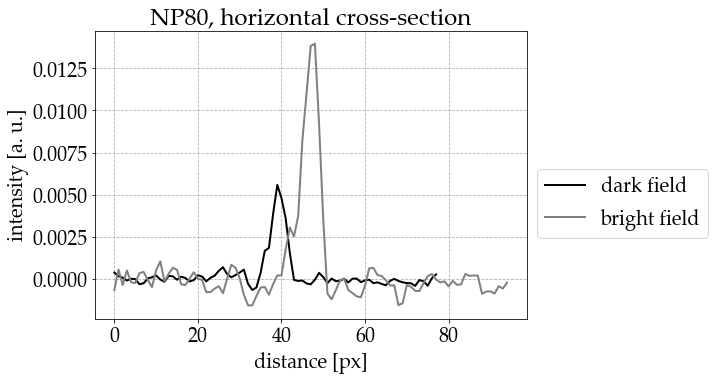

In [60]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 1])
axes.grid(linestyle='--')
axes.set_title('NP80, horizontal cross-section')
axes.set_xlabel('distance [px]')
axes.set_ylabel('intensity [a. u.]')


axes.plot(data[0][:,0], data[0][:,1], linewidth=2, label = 'dark field', color = 'black')
# axes.plot(data[1][:,0], data[1][:,1], linewidth=2, label = names[1])
axes.plot(data[2][:,0], -+data[2][:,1], linewidth=2, label = 'bright field', color = 'grey')
# axes.plot(data[3][:,0], data[3][:,1], linewidth=2, label = names[3])



lgd = fig.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

fig.savefig(folder + axes.get_title()[6:] +'.png', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')    


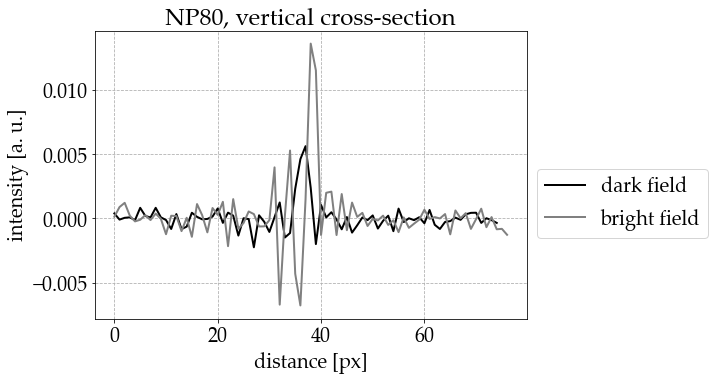

In [63]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 1])
axes.grid(linestyle='--')
axes.set_title('NP80, vertical cross-section')
axes.set_xlabel('distance [px]')
axes.set_ylabel('intensity [a. u.]')


axes.plot(data[1][:,0], data[1][:,1], linewidth=2, label = 'dark field', color = 'black')
axes.plot(data[3][:,0], -data[3][:,1], linewidth=2, label = 'bright field', color = 'grey')



lgd = fig.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

fig.savefig(folder + axes.get_title()[6:] +'.png', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')    


'vertical cross-section'